# 数据科学导论大作业AwesomeLoan by archester-250,1475505

## 第一部分：数据预处理

In [26]:
import numpy as np
import pandas as pd

In [27]:
# 导入数据库
df = pd.read_csv('train-data.csv', index_col = None)

## 第二部分：数据探索

### 初步分析

In [28]:
#我们先看看有什么属性和对应的特征。
df.describe()

Id        Income            Age     Experience  \
count  201600.000000  1.912070e+05  201600.000000  201600.000000   
mean   100799.500000  4.997339e+06      44.385208      10.085625   
std     58197.051472  2.881432e+06      22.491666       6.002003   
min         0.000000  1.031000e+04       0.000000       0.000000   
25%     50399.750000  2.499018e+06      29.000000       5.000000   
50%    100799.500000  5.000063e+06      46.000000      10.000000   
75%    151199.250000  7.480562e+06      63.000000      15.000000   
max    201599.000000  9.999938e+06      79.000000      20.000000   

       CURRENT_JOB_YRS  CURRENT_HOUSE_YRS      Risk_Flag  
count    201600.000000      201600.000000  201600.000000  
mean          6.334072          11.995928       0.122778  
std           3.644423           1.399482       0.328183  
min           0.000000          10.000000       0.000000  
25%           3.000000          11.000000       0.000000  
50%           6.000000          12.000000       0.000000  
75%           9.000000          13.000000       0.000000  
max          14.000000          14.000000       1.000000

In [29]:
# 这么看也是很不错的
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201600 entries, 0 to 201599
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 201600 non-null  int64  
 1   Income             191207 non-null  float64
 2   Age                201600 non-null  int64  
 3   Experience         201600 non-null  int64  
 4   Married/Single     201600 non-null  object 
 5   House_Ownership    201600 non-null  object 
 6   Car_Ownership      201600 non-null  object 
 7   Profession         201600 non-null  object 
 8   CITY               201600 non-null  object 
 9   STATE              201600 non-null  object 
 10  CURRENT_JOB_YRS    201600 non-null  int64  
 11  CURRENT_HOUSE_YRS  201600 non-null  int64  
 12  Risk_Flag          201600 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 20.0+ MB


另外注意到id列无用，可以删除。

In [30]:
#删除id
df.drop(columns=['Id'], inplace=True)
df

Income  Age  Experience Married/Single House_Ownership  \
0       1392884.0   29          11         single          rented   
1       2800634.0    0          12         single          rented   
2       4121059.0   52          17         single          rented   
3       4065331.0   70          14         single          rented   
4             NaN   74          13         single          rented   
...           ...  ...         ...            ...             ...   
201595        NaN   56           5         single    norent_noown   
201596  6298025.0    0           2         single          rented   
201597  1667463.0    0          16        married          rented   
201598  1238515.0    0           4         single          rented   
201599  5176250.0   42          14         single          rented   

       Car_Ownership        Profession        CITY          STATE  \
0                yes         Scientist    Varanasi  Uttar_Pradesh   
1                 no      Web_designer        Agra  Uttar_Pradesh   
2                 no           Aviator  Saharanpur  Uttar_Pradesh   
3                 no    Civil_engineer        Pune    Maharashtra   
4                 no            Lawyer    Junagadh        Gujarat   
...              ...               ...         ...            ...   
201595            no        Technician       Thane    Maharashtra   
201596            no  Fashion_Designer        Loni  Uttar_Pradesh   
201597           yes    Police_officer    Bhusawal    Maharashtra   
201598           yes    Civil_engineer     Belgaum      Karnataka   
201599            no           Analyst     Bhiwani        Haryana   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0                     5                 14          0  
1                     8                 13          0  
2                     5                 10          0  
3                     9                 14          0  
4                     3                 13          0  
...                 ...                ...        ...  
201595                5                 10          0  
201596                2                 12          0  
201597               10                 11          0  
201598                4                 13          0  
201599                6                 14          0  

[201600 rows x 12 columns]

## 缺失值处理

看，我们发现了什么？Income居然有空的情况，可能是不好意思写上去吧，这个时候有两种选择：
- 用统计特征值代替
- 直接丢弃对应的列：info：Income的异常值占了约1/20的总量，还是有必要进行处理的，不能浪费

选哪个呢？[TODO]

In [31]:
# 我们还可以看一些有关房子年龄的分类统计
df['CURRENT_HOUSE_YRS'].value_counts().head(10)

12    41478
11    41386
13    40495
14    39138
10    39103
Name: CURRENT_HOUSE_YRS, dtype: int64

这么平均的吗

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

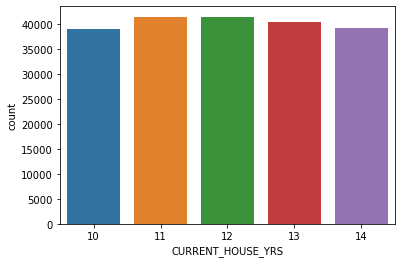

In [32]:
# 我们不妨可视化一下这些指标吧
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = "CURRENT_HOUSE_YRS", data = df)

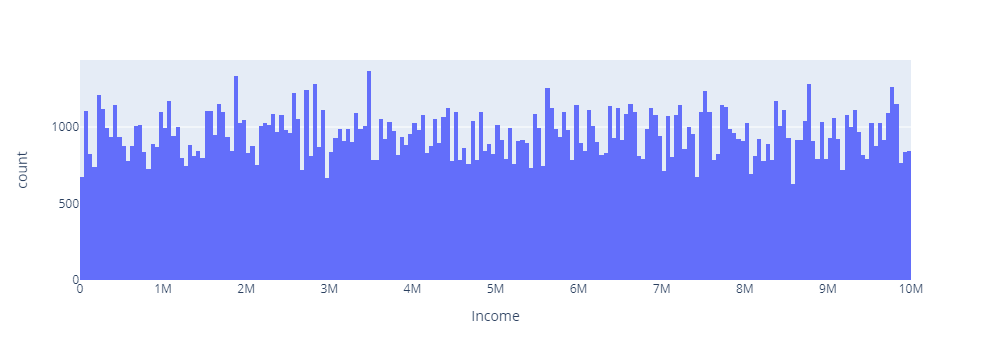

In [33]:
# hh，尝试结束。接下来我们绘制Income的分布图看看
import plotly.express as px
px.histogram(df, x = "Income")

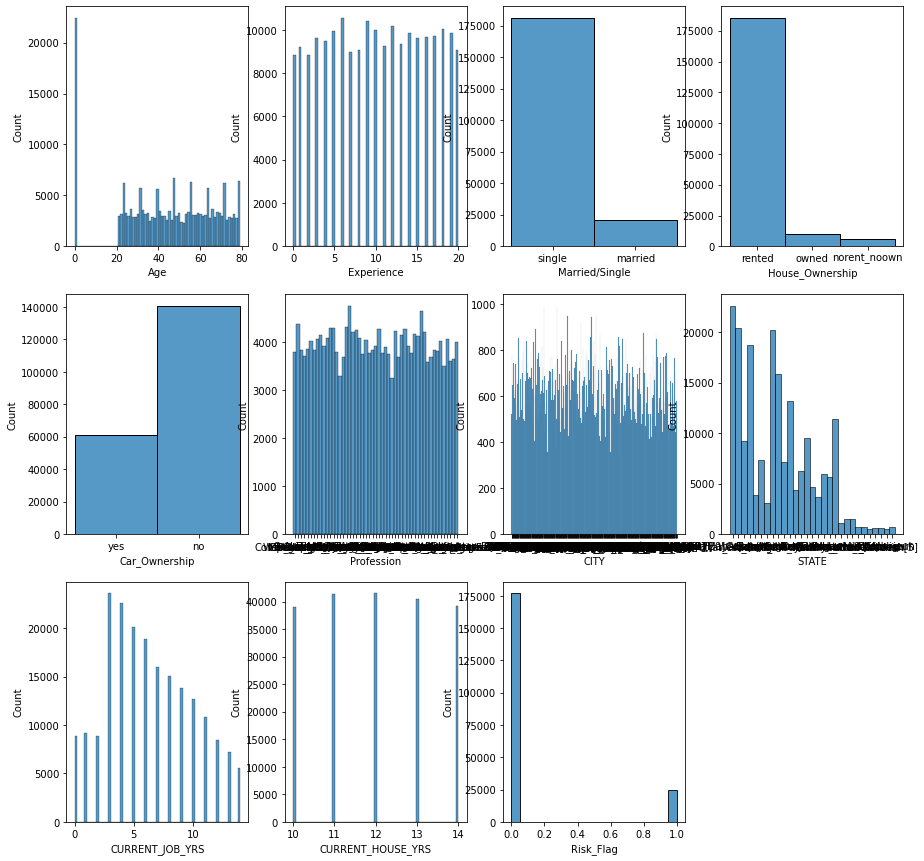

In [34]:
# 好平均啊，我们需要看看别的分布情况，来判断选择哪种处理方式了。
plt.figure(figsize=(15,15))
idx = 1
for i in df.columns[1:]:
    plt.subplot(3, 4, idx)
    idx = idx + 1
    sns.histplot(x = i, data = df, kde=False)
plt.show()

好吧，还有异常值。Age异常值量20000+，不能浪费(wxl注：没注意到尚未处理income，亮神自由发挥)

In [35]:
tmpdf = df[df["Age"] == 0]
# plt.figure(figsize=(15,15))
# idx = 1
# for i in tmpdf.columns[1:]:
#     plt.subplot(3, 4, idx)
#     idx = idx + 1
#     sns.histplot(x = i, data = tmpdf, kde=False)
# plt.show()
# 比对结果：除是否有车外，基本一致

处理完income值后，因为从图上看目前只有age有异常值，所以可以考虑用回归分析预测异常值并填充。

### 标准化

### 字符串值处理

可以看到，是否已婚、房子拥有形式、是否有车、专业、城市、州是离散值，需要离散化。

In [36]:
def one_hot_encode(data):
    """
    Return the one-hot encoded dataframe of our input data.
    
    Parameters
    -----------
    data: a dataframe that may include non-numerical features
    
    Returns
    -----------
    A one-hot encoded dataframe that only contains numeric features
    
    """
    return pd.get_dummies(data)    
df = one_hot_encode(df)
df.head()

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  \
0  1392884.0   29          11                5                 14          0   
1  2800634.0    0          12                8                 13          0   
2  4121059.0   52          17                5                 10          0   
3  4065331.0   70          14                9                 14          0   
4        NaN   74          13                3                 13          0   

   Married/Single_married  Married/Single_single  \
0                       0                      1   
1                       0                      1   
2                       0                      1   
3                       0                      1   
4                       0                      1   

   House_Ownership_norent_noown  House_Ownership_owned  ...  STATE_Punjab  \
0                             0                      0  ...             0   
1                             0                      0  ...             0   
2                             0                      0  ...             0   
3                             0                      0  ...             0   
4                             0                      0  ...             0   

   STATE_Rajasthan  STATE_Sikkim  STATE_Tamil_Nadu  STATE_Telangana  \
0                0             0                 0                0   
1                0             0                 0                0   
2                0             0                 0                0   
3                0             0                 0                0   
4                0             0                 0                0   

   STATE_Tripura  STATE_Uttar_Pradesh  STATE_Uttar_Pradesh[5]  \
0              0                    1                       0   
1              0                    1                       0   
2              0                    1                       0   
3              0                    0                       0   
4              0                    0                       0   

   STATE_Uttarakhand  STATE_West_Bengal  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  

[5 rows x 410 columns]

In [37]:
# 使用回归分析填充异常值(未完成，字符串需要onehot处理)
# from sklearn.ensemble import RandomForestRegressor
# train_df_age = df.loc[df['Age'] != 0]
# predict_df_age = df.loc[df['Age'] == 0]
# X = df.drop(columns=['Age']).values
# Y = df['Age'].values
# print(Y.shape)
# regr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
# regr.fit(X, Y)
# predict_age = regr.predict(df.drop(columns=['Age']))
# df.loc[df['Age'] == 0, 'Age'] = predict_age

# 使用回归分析填充异常值(未完成，字符串需要onehot处理)
from sklearn.linear_model import LinearRegression
# train_df_age = df.loc[df['Age'] != 0]
# predict_df_age = df.loc[df['Age'] == 0]
X = df.drop(columns=['Age', 'Income'])
X1 = X[df['Age'] != 0].values
X2 = X[df['Income'].notna()].values
Y1 = df[df['Age'] != 0]['Age'].values
Y2 = df[df['Income'].notna()]['Income'].values
print(X1.shape, X2.shape, Y1.shape, Y2.shape)
regr = LinearRegression()
regr.fit(X1, Y1)
predict_age = regr.predict(X[df['Age'] == 0].values).astype(int)
regr.fit(X2, Y2)
predict_income = regr.predict(X[df['Income'].isna()].values)
df.loc[df['Age'] == 0, 'Age'] = predict_age
df.loc[df['Income'].isna(), 'Income'] = predict_income

(179170, 408) (191207, 408) (179170,) (191207,)


In [13]:
#z-标准化
# df = df.apply(lambda x : (x - np.mean(x)) / np.std(x))
# df

Income       Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0      -1.282945 -1.293566    0.152345        -0.366060           1.432014   
1      -0.781885 -0.240750    0.318957         0.457118           0.717462   
2      -0.311906  0.130833    1.152014        -0.366060          -1.426194   
3      -0.331741  1.245579    0.652180         0.731511           1.432014   
4       0.200643  1.493301    0.485568        -0.914845           0.717462   
...          ...       ...         ...              ...                ...   
201595 -0.321463  0.378554   -0.847323        -0.366060          -1.426194   
201596  0.462941  0.130833   -1.347158        -1.189237           0.002910   
201597 -1.185214  0.068902    0.985403         1.005903          -0.711642   
201598 -1.337889 -0.488471   -1.013935        -0.640452           0.717462   
201599  0.063668 -0.488471    0.652180        -0.091667           1.432014   

        Risk_Flag  Married/Single_married  Married/Single_single  \
0       -0.374115               -0.337014               0.337014   
1       -0.374115               -0.337014               0.337014   
2       -0.374115               -0.337014               0.337014   
3       -0.374115               -0.337014               0.337014   
4       -0.374115               -0.337014               0.337014   
...           ...                     ...                    ...   
201595  -0.374115               -0.337014               0.337014   
201596  -0.374115               -0.337014               0.337014   
201597  -0.374115                2.967237              -2.967237   
201598  -0.374115               -0.337014               0.337014   
201599  -0.374115               -0.337014               0.337014   

        House_Ownership_norent_noown  House_Ownership_owned  ...  \
0                          -0.172065              -0.232596  ...   
1                          -0.172065              -0.232596  ...   
2                          -0.172065              -0.232596  ...   
3                          -0.172065              -0.232596  ...   
4                          -0.172065              -0.232596  ...   
...                              ...                    ...  ...   
201595                      5.811765              -0.232596  ...   
201596                     -0.172065              -0.232596  ...   
201597                     -0.172065              -0.232596  ...   
201598                     -0.172065              -0.232596  ...   
201599                     -0.172065              -0.232596  ...   

        STATE_Punjab  STATE_Rajasthan  STATE_Sikkim  STATE_Tamil_Nadu  \
0          -0.139587        -0.193983     -0.048546         -0.264738   
1          -0.139587        -0.193983     -0.048546         -0.264738   
2          -0.139587        -0.193983     -0.048546         -0.264738   
3          -0.139587        -0.193983     -0.048546         -0.264738   
4          -0.139587        -0.193983     -0.048546         -0.264738   
...              ...              ...           ...               ...   
201595     -0.139587        -0.193983     -0.048546         -0.264738   
201596     -0.139587        -0.193983     -0.048546         -0.264738   
201597     -0.139587        -0.193983     -0.048546         -0.264738   
201598     -0.139587        -0.193983     -0.048546         -0.264738   
201599     -0.139587        -0.193983     -0.048546         -0.264738   

        STATE_Telangana  STATE_Tripura  STATE_Uttar_Pradesh  \
0             -0.174977      -0.056433             2.812001   
1             -0.174977      -0.056433             2.812001   
2             -0.174977      -0.056433             2.812001   
3             -0.174977      -0.056433            -0.355619   
4             -0.174977      -0.056433            -0.355619   
...                 ...            ...                  ...   
201595        -0.174977      -0.056433            -0.355619   
201596        -0.174977      -0.056433             2.81200

## 第三部分：模型

In [38]:
# 因为目标为输出概率，使用
from sklearn.linear_model import *
X = df.drop(columns=['Risk_Flag'])
Y = df['Risk_Flag']
Y[Y < 0] = 0
Y[Y > 0] = 1
Y = Y.astype(int)
Y
lr = LinearRegression()
lor = LogisticRegression(penalty='l2', solver='sag')
lr.fit(X, Y)
lr.score(X, Y)
lor.fit(X, Y)
lor.score(X, Y)

C:\Users\ll\AppData\Local\Temp\ipykernel_8840\358195739.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ll\AppData\Local\Temp\ipykernel_8840\358195739.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Apps\Python\envs\data100\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



0.8772222222222222

In [ ]:
# 使用网格调参
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_iter': np.linspace(150, 150, 1).astype(int).tolist()
}
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5, scoring='roc_auc')
grid_search.fit(X, Y)
print('默认分类器最优参数:', grid_search.best_params_)
print('最优AUC:', grid_search.best_score_)

In [39]:
from sklearn.metrics import roc_curve,auc
# fpr, tpr, thresholds = roc_curve(Y, lor.predict_proba(X)[:, 1])
fpr, tpr, thresholds = roc_curve(Y, lr.predict(X))
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.6368642820475855


In [23]:
lr.predict(X)

array([0.20534752, 0.0644887 , 0.15368414, ..., 0.16840317, 0.06454492,
       0.07600108])

In [27]:
lor.predict_proba(X)[:, 1].mean()#logistic

0.12277783333318469

In [42]:
lr.predict( test.drop(columns = ["Id"]))

KeyError: "['Id'] not found in axis"

In [40]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve,auc

X = df.drop(columns=['Risk_Flag'])
Y = df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)
y_pred_quant = rf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
print(auc(fpr, tpr))

0.6330508057995156


In [41]:
# from sklearn.svm import SVC
# X = df.drop(columns=['Risk_Flag'])
# Y = df['Risk_Flag']
# Y[Y <= 0] = 0
# Y[Y > 0] = 1
# Y = Y.astype(int)
# Y
# model = SVC()
# model.fit(X, Y)
# model.predict_proba(X)


In [42]:
test = pd.read_csv('test-data.csv', index_col = None)
test = test.drop(columns = ["Id"])
test = one_hot_encode(test)

X = test.drop(columns=['Age', 'Income'])
X1 = X[test['Age'] != 0].values
X2 = X[test['Income'].notna()].values
Y1 = test[test['Age'] != 0]['Age'].values
Y2 = test[test['Income'].notna()]['Income'].values

print(X1.shape, X2.shape, Y1.shape, Y2.shape)
regr = LinearRegression()
regr.fit(X1, Y1)
predict_age = regr.predict(X[test['Age'] == 0].values).astype(int)
regr.fit(X2, Y2)
predict_income = regr.predict(X[test['Income'].isna()].values)
test.loc[test['Age'] == 0, 'Age'] = predict_age
test.loc[test['Income'].isna(), 'Income'] = predict_income

# test = test.apply(lambda x : (x - np.mean(x)) / np.std(x))

(44816, 407) (47756, 407) (44816,) (47756,)


In [43]:
dataframe = pd.DataFrame(lr.predict(test), index=None)  
dataframe.to_csv("linear.csv", header=None, index=None)   

In [45]:
dataframe = pd.DataFrame(lor.predict_proba(test)[:, 1], index=None)  #index表示是否显示行名，default=True
dataframe.to_csv("logistic.csv", header=None, index=None)   

In [35]:
test.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Married/Single_married', 'Married/Single_single',
       'House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented',
       ...
       'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim', 'STATE_Tamil_Nadu',
       'STATE_Telangana', 'STATE_Tripura', 'STATE_Uttar_Pradesh',
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West_Bengal'],
      dtype='object', length=409)

In [37]:
lr.predict(X)

array([0.20338607, 0.06154037, 0.15406966, ..., 0.17805648, 0.0737474 ,
       0.07304549])

In [36]:
X.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Married/Single_married', 'Married/Single_single',
       'House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented',
       ...
       'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim', 'STATE_Tamil_Nadu',
       'STATE_Telangana', 'STATE_Tripura', 'STATE_Uttar_Pradesh',
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West_Bengal'],
      dtype='object', length=409)

In [61]:
test

Income       Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0      0.059620  1.376217   -1.012448        -0.637884           1.427640   
1     -1.016489 -0.179044   -0.179799         0.455743          -1.435166   
2     -1.695324  1.065164   -1.012448        -0.911291          -0.719464   
3     -1.233183  0.380850   -0.179799         0.729150          -1.435166   
4     -0.134357 -1.423252    0.486320         1.822777          -1.435166   
...         ...       ...         ...              ...                ...   
50395 -0.763452 -1.672094    0.985909         1.822777          -0.719464   
50396 -1.513700 -1.485462    0.153260         1.002557           1.427640   
50397  1.726443  1.189585    1.485498         0.729150          -0.003763   
50398  0.209186 -1.547673   -1.512037        -1.458104          -0.003763   
50399 -0.973779 -1.796515    0.985909         0.729150          -1.435166   

       Married/Single_married  Married/Single_single  \
0                   -0.337944               0.337944   
1                   -0.337944               0.337944   
2                    2.959070              -2.959070   
3                   -0.337944               0.337944   
4                   -0.337944               0.337944   
...                       ...                    ...   
50395               -0.337944               0.337944   
50396               -0.337944               0.337944   
50397               -0.337944               0.337944   
50398               -0.337944               0.337944   
50399               -0.337944               0.337944   

       House_Ownership_norent_noown  House_Ownership_owned  \
0                         -0.168222              -0.231849   
1                         -0.168222              -0.231849   
2                         -0.168222              -0.231849   
3                         -0.168222              -0.231849   
4                         -0.168222               4.313150   
...                             ...                    ...   
50395                     -0.168222              -0.231849   
50396                     -0.168222              -0.231849   
50397                     -0.168222              -0.231849   
50398                     -0.168222              -0.231849   
50399                     -0.168222              -0.231849   

       House_Ownership_rented  ...  STATE_Punjab  STATE_Rajasthan  \
0                    0.291932  ...     -0.132301        -0.195916   
1                    0.291932  ...     -0.132301        -0.195916   
2                    0.291932  ...     -0.132301        -0.195916   
3                    0.291932  ...     -0.132301        -0.195916   
4                   -3.425449  ...     -0.132301        -0.195916   
...                       ...  ...           ...              ...   
50395                0.291932  ...     -0.132301        -0.195916   
50396                0.291932  ...     -0.132301        -0.195916   
50397                0.291932  ...     -0.132301        -0.195916   
50398                0.291932  ...     -0.132301        -0.195916   
50399                0.291932  ...     -0.132301        -0.195916   

       STATE_Sikkim  STATE_Tamil_Nadu  STATE_Telangana  STATE_Tripura  \
0         -0.051632          3.757860        -0.177237      -0.058004   
1         -0.051632         -0.266109        -0.177237      -0.058004   
2         -0.051632         -0.266109        -0.177237      -0.058004   
3         -0.051632         -0.266109        -0.177237      -0.058004   
4         -0.051632         -0.266109        -0.177237      -0.058004   
...             ...               ...              ...            ...   
50395     -0.051632         -0.266109        -0.177237      -0.058004   
50396     -0.051632         -0.266109        -0.177237      -0.058004   
50397     -0.051632         -0.266109        -0.177237      -0.058004   
50398     -0.051632         -0.266109        -0.177237      -0.058004   
50399     -0.051632         -0.266

In [46]:
print(lr)

LinearRegression()


In [62]:
test.describe()

Income           Age    Experience  CURRENT_JOB_YRS  \
count  5.040000e+04  5.040000e+04  5.040000e+04     5.040000e+04   
mean  -4.990717e-17 -8.532857e-17 -1.344251e-16     4.314009e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00     1.000010e+00   
min   -1.779501e+00 -1.796515e+00 -1.678566e+00    -1.731511e+00   
25%   -8.483966e-01 -8.011479e-01 -8.459180e-01    -9.112909e-01   
50%   -1.207187e-03  7.587449e-03 -1.326951e-02    -9.107050e-02   
75%    8.263970e-01  8.163228e-01  8.193790e-01     7.291499e-01   
max    1.790401e+00  1.811689e+00  1.652027e+00     2.096184e+00   

       CURRENT_HOUSE_YRS  Married/Single_married  Married/Single_single  \
count       5.040000e+04            5.040000e+04           5.040000e+04   
mean        9.079157e-17            4.793344e-18           1.302662e-16   
std         1.000010e+00            1.000010e+00           1.000010e+00   
min        -1.435166e+00           -3.379440e-01          -2.959070e+00   
25%        -7.194644e-01           -3.379440e-01           3.379440e-01   
50%        -3.763112e-03           -3.379440e-01           3.379440e-01   
75%         7.119382e-01           -3.379440e-01           3.379440e-01   
max         1.427640e+00            2.959070e+00           3.379440e-01   

       House_Ownership_norent_noown  House_Ownership_owned  \
count                  5.040000e+04           5.040000e+04   
mean                  -1.466199e-17          -2.241593e-17   
std                    1.000010e+00           1.000010e+00   
min                   -1.682219e-01          -2.318491e-01   
25%                   -1.682219e-01          -2.318491e-01   
50%                   -1.682219e-01          -2.318491e-01   
75%                   -1.682219e-01          -2.318491e-01   
max                    5.944528e+00           4.313150e+00   

       House_Ownership_rented  ...  STATE_Punjab  STATE_Rajasthan  \
count            5.040000e+04  ...  5.040000e+04     5.040000e+04   
mean             7.020839e-17  ... -8.071145e-18    -5.040060e-17   
std              1.000010e+00  ...  1.000010e+00     1.000010e+00   
min             -3.425449e+00  ... -1.323007e-01    -1.959160e-01   
25%              2.919325e-01  ... -1.323007e-01    -1.959160e-01   
50%              2.919325e-01  ... -1.323007e-01    -1.959160e-01   
75%              2.919325e-01  ... -1.323007e-01    -1.959160e-01   
max              2.919325e-01  ...  7.558537e+00     5.104228e+00   

       STATE_Sikkim  STATE_Tamil_Nadu  STATE_Telangana  STATE_Tripura  \
count  5.040000e+04      5.040000e+04     5.040000e+04   5.040000e+04   
mean   1.353415e-17     -5.357267e-18    -5.596934e-17  -3.552714e-17   
std    1.000010e+00      1.000010e+00     1.000010e+00   1.000010e+00   
min   -5.163156e-02     -2.661089e-01    -1.772373e-01  -5.800393e-02   
25%   -5.163156e-02     -2.661089e-01    -1.772373e-01  -5.800393e-02   
50%   -5.163156e-02     -2.661089e-01    -1.772373e-01  -5.800393e-02   
75%   -5.163156e-02     -2.661089e-01    -1.772373e-01  -5.800393e-02   
max    1.936800e+01      3.757860e+00     5.642152e+00   1.724021e+01   

       STATE_Uttar_Pradesh  STATE_Uttar_Pradesh[5]  STATE_Uttarakhand  \
count         5.040000e+04            5.040000e+04       5.040000e+04   
mean          4.229421e-18            2.794942e-17       1.325219e-17   
std           1.000010e+00            1.000010e+00       1.000010e+00   
min          -3.594570e-01           -5.258863e-02      -9.078534e-02   
25%          -3.594570e-01           -5.258863e-02      -9.078534e-02   
50%          -3.594570e-01           -5.258863e-02      -9.078534e-02   
75%          -3.594570e-01           -5.258863e-02      -9.078534e-02   
max           2.781974e+00            1.901552e+01       1.101499e+01   

       STATE_West_Bengal  
count       5.040000e+04  
mean       -1.409807e-18  
std         1.000010e+00  
min        -3.205811e-01  
25%        -3.205811e-01  
50%        -3.205811e-01  
75%        -3.205811e-01  
max        

In [59]:
X.describe()

Income           Age    Experience  CURRENT_JOB_YRS  \
count  2.016000e+05  2.016000e+05  2.016000e+05     2.016000e+05   
mean  -6.851662e-17  2.008975e-16 -5.054158e-17     2.935923e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00     1.000002e+00   
min   -1.775044e+00 -1.789009e+00 -1.680381e+00    -1.738022e+00   
25%   -8.483982e-01 -7.981230e-01 -8.473234e-01    -9.148446e-01   
50%   -7.691359e-04  6.971774e-03 -1.426611e-02    -9.166698e-02   
75%    8.348014e-01  8.120666e-01  8.187912e-01     7.315106e-01   
max    1.780562e+00  1.802952e+00  1.651849e+00     2.103473e+00   

       CURRENT_HOUSE_YRS  Married/Single_married  Married/Single_single  \
count       2.016000e+05            2.016000e+05           2.016000e+05   
mean        5.117247e-16           -3.538616e-17           3.538616e-17   
std         1.000002e+00            1.000002e+00           1.000002e+00   
min        -1.426194e+00           -3.370139e-01          -2.967237e+00   
25%        -7.116419e-01           -3.370139e-01           3.370139e-01   
50%         2.909956e-03           -3.370139e-01           3.370139e-01   
75%         7.174619e-01           -3.370139e-01           3.370139e-01   
max         1.432014e+00            2.967237e+00           3.370139e-01   

       House_Ownership_norent_noown  House_Ownership_owned  \
count                  2.016000e+05           2.016000e+05   
mean                   4.215323e-17           5.681522e-17   
std                    1.000002e+00           1.000002e+00   
min                   -1.720648e-01          -2.325965e-01   
25%                   -1.720648e-01          -2.325965e-01   
50%                   -1.720648e-01          -2.325965e-01   
75%                   -1.720648e-01          -2.325965e-01   
max                    5.811765e+00           4.299292e+00   

       House_Ownership_rented  ...  STATE_Punjab  STATE_Rajasthan  \
count            2.016000e+05  ...  2.016000e+05     2.016000e+05   
mean             4.137784e-17  ... -1.282924e-17    -1.085551e-17   
std              1.000002e+00  ...  1.000002e+00     1.000002e+00   
min             -3.389338e+00  ... -1.395869e-01    -1.939833e-01   
25%              2.950429e-01  ... -1.395869e-01    -1.939833e-01   
50%              2.950429e-01  ... -1.395869e-01    -1.939833e-01   
75%              2.950429e-01  ... -1.395869e-01    -1.939833e-01   
max              2.950429e-01  ...  7.163998e+00     5.155084e+00   

       STATE_Sikkim  STATE_Tamil_Nadu  STATE_Telangana  STATE_Tripura  \
count  2.016000e+05      2.016000e+05     2.016000e+05   2.016000e+05   
mean  -2.467162e-19     -8.395401e-17    -2.118235e-17  -6.943300e-18   
std    1.000002e+00      1.000002e+00     1.000002e+00   1.000002e+00   
min   -4.854618e-02     -2.647384e-01    -1.749768e-01  -5.643326e-02   
25%   -4.854618e-02     -2.647384e-01    -1.749768e-01  -5.643326e-02   
50%   -4.854618e-02     -2.647384e-01    -1.749768e-01  -5.643326e-02   
75%   -4.854618e-02     -2.647384e-01    -1.749768e-01  -5.643326e-02   
max    2.059894e+01      3.777314e+00     5.715043e+00   1.772005e+01   

       STATE_Uttar_Pradesh  STATE_Uttar_Pradesh[5]  STATE_Uttarakhand  \
count         2.016000e+05            2.016000e+05       2.016000e+05   
mean         -1.917338e-17            2.178152e-17      -5.921189e-18   
std           1.000002e+00            1.000002e+00       1.000002e+00   
min          -3.556187e-01           -5.481820e-02      -8.546906e-02   
25%          -3.556187e-01           -5.481820e-02      -8.546906e-02   
50%          -3.556187e-01           -5.481820e-02      -8.546906e-02   
75%          -3.556187e-01           -5.481820e-02      -8.546906e-02   
max           2.812001e+00            1.824212e+01       1.170014e+01   

       STATE_West_Bengal  
count       2.016000e+05  
mean        1.268826e-17  
std         1.000002e+00  
min        -3.205623e-01  
25%        -3.205623e-01  
50%        -3.205623e-01  
75%        -3.205623e-01  
max        

0         0
1         0
2         0
3         0
4         0
         ..
201595    0
201596    0
201597    0
201598    0
201599    0
Name: Risk_Flag, Length: 201600, dtype: int32